In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import math as mt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [32]:
now = datetime.now()
print ("Son Güncelleme: TSİ", now.strftime("%H:%M:%S %d-%m-%Y"))

Son Güncelleme: TSİ 18:00:21 17-04-2020


# COVID19 TR Grafikler - Cam, M.N.

In [33]:
#Importing .csv file
x = pd.read_csv("./Tr_data.csv", sep=",")

date       = x["Tarih"].values.tolist()
case       = x["Toplam Vaka Sayısı"].values.tolist()
new_cases  = x["Yeni Vaka Sayısı"].values.tolist()
deaths     = x["Ölüm Sayısı"].values.tolist()
made_tests = x["Yapılan Test Sayısı"].values.tolist()


In [34]:
#Strings to date and integer

i = 1
while i<=len(date):
    variable = date[i-1]
    date[i-1] = datetime.strptime(variable, '%Y-%m-%d').date()
    i=i+1
    
i = 1
while i<=len(case):
    case[i-1] = int(case[i-1])
    i=i+1
    
i = 1
while i<=len(new_cases):
    new_cases[i-1] = int(new_cases[i-1])
    i=i+1
    
i= 1
while i<=len(deaths):
    deaths[i-1] = int(deaths[i-1])
    i=i+1

i= 1
while i<=len(made_tests):
    made_tests[i-1] = int(made_tests[i-1])
    i=i+1

## Vaka Sayısı

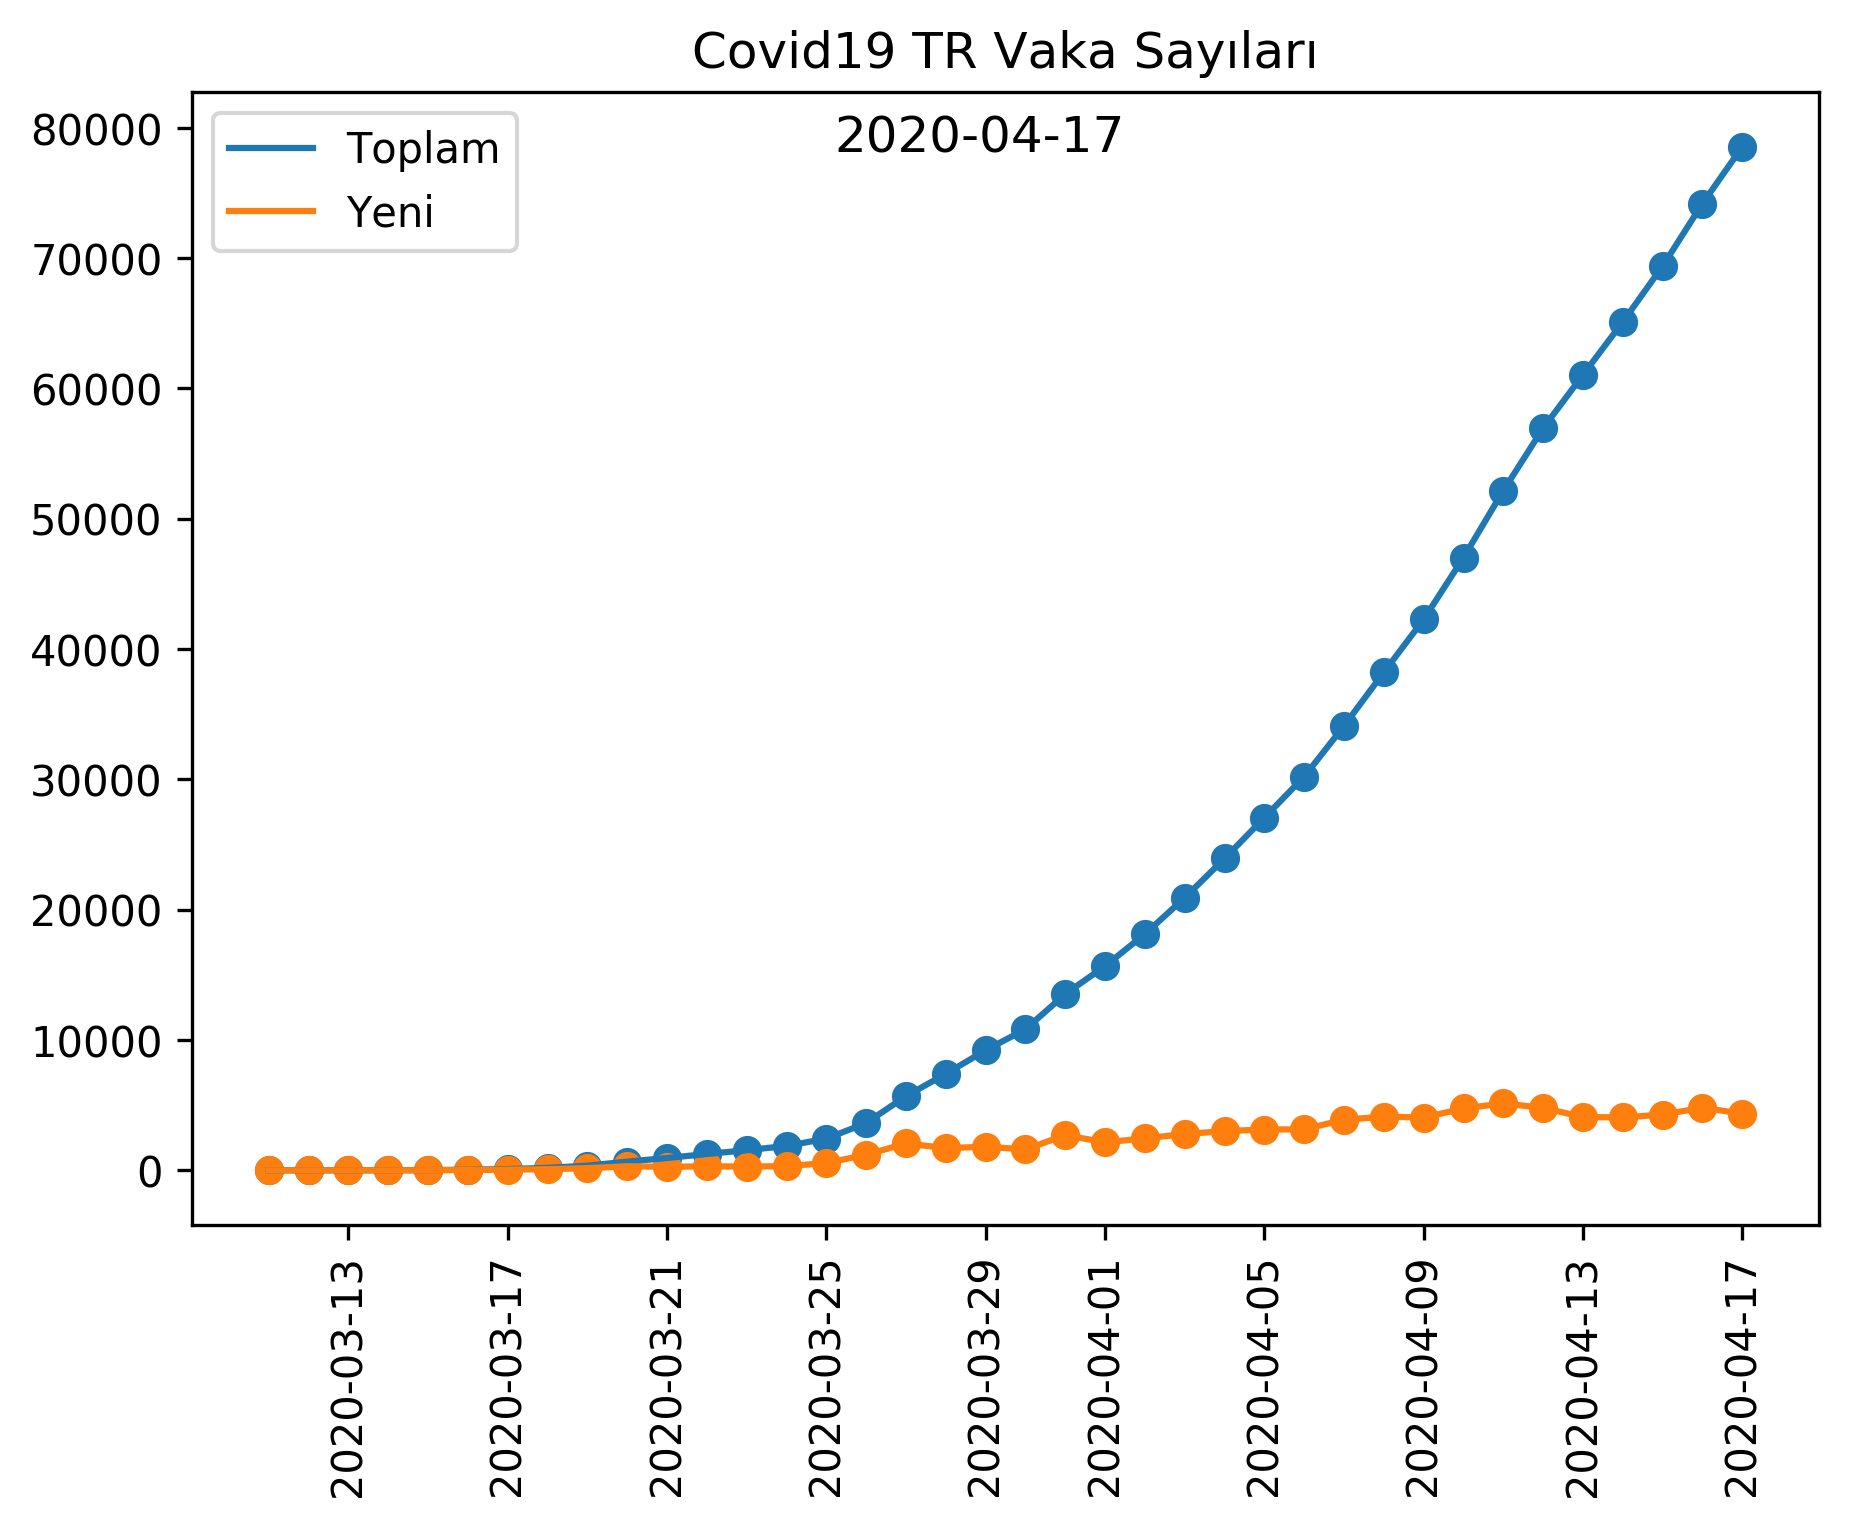

In [35]:
name = str(date[-1])
name_cases = "cases" + name +".png"

#vaka sayısı grafik
plt.figure(dpi=300,figsize=(7,5))
plt.plot(date,case)
plt.scatter(date,case)
plt.plot(date,new_cases)
plt.scatter(date,new_cases)
plt.legend(["Toplam","Yeni"])
plt.title("Covid19 TR Vaka Sayıları")
plt.xticks(rotation=90)
plt.figtext(.5,.84,date[-1], fontsize=12, ha='center')
plt.show()


## Ölüm Sayıları

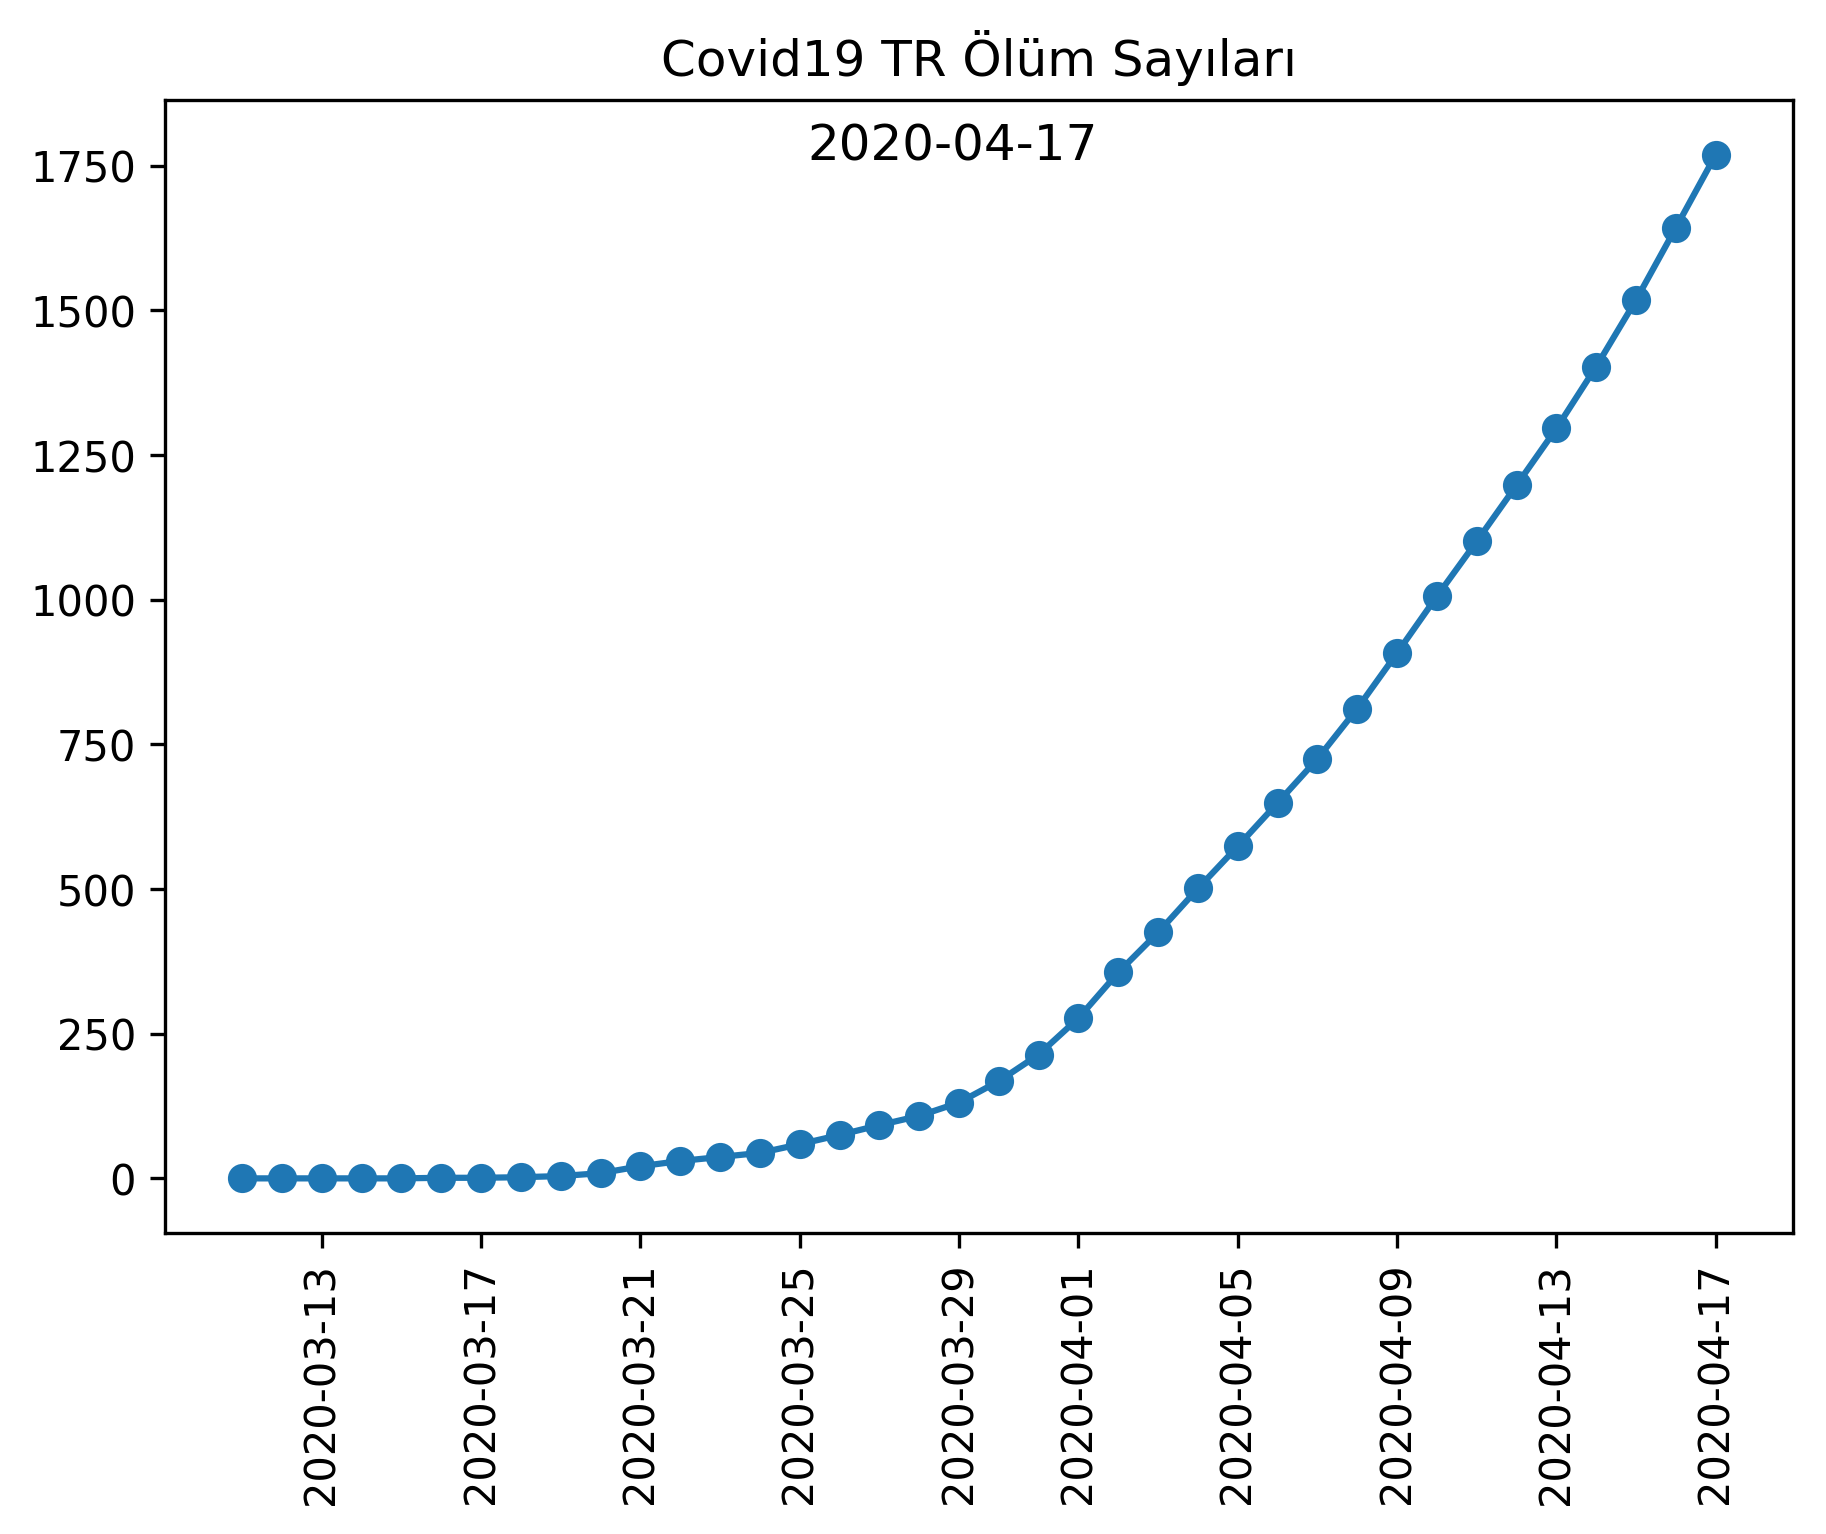

In [36]:
name = str(date[-1])
name_deaths = "deaths" + name +".png"

#vaka sayısı grafik
plt.figure(dpi=300,figsize=(7,5))
plt.plot(date,deaths)
plt.scatter(date,deaths)
plt.title("Covid19 TR Ölüm Sayıları")
plt.xticks(rotation=90)
plt.figtext(.5,.84,date[-1], fontsize=12, ha='center')
plt.show()



## Yapılan Test & Yeni Vaka Sayısı

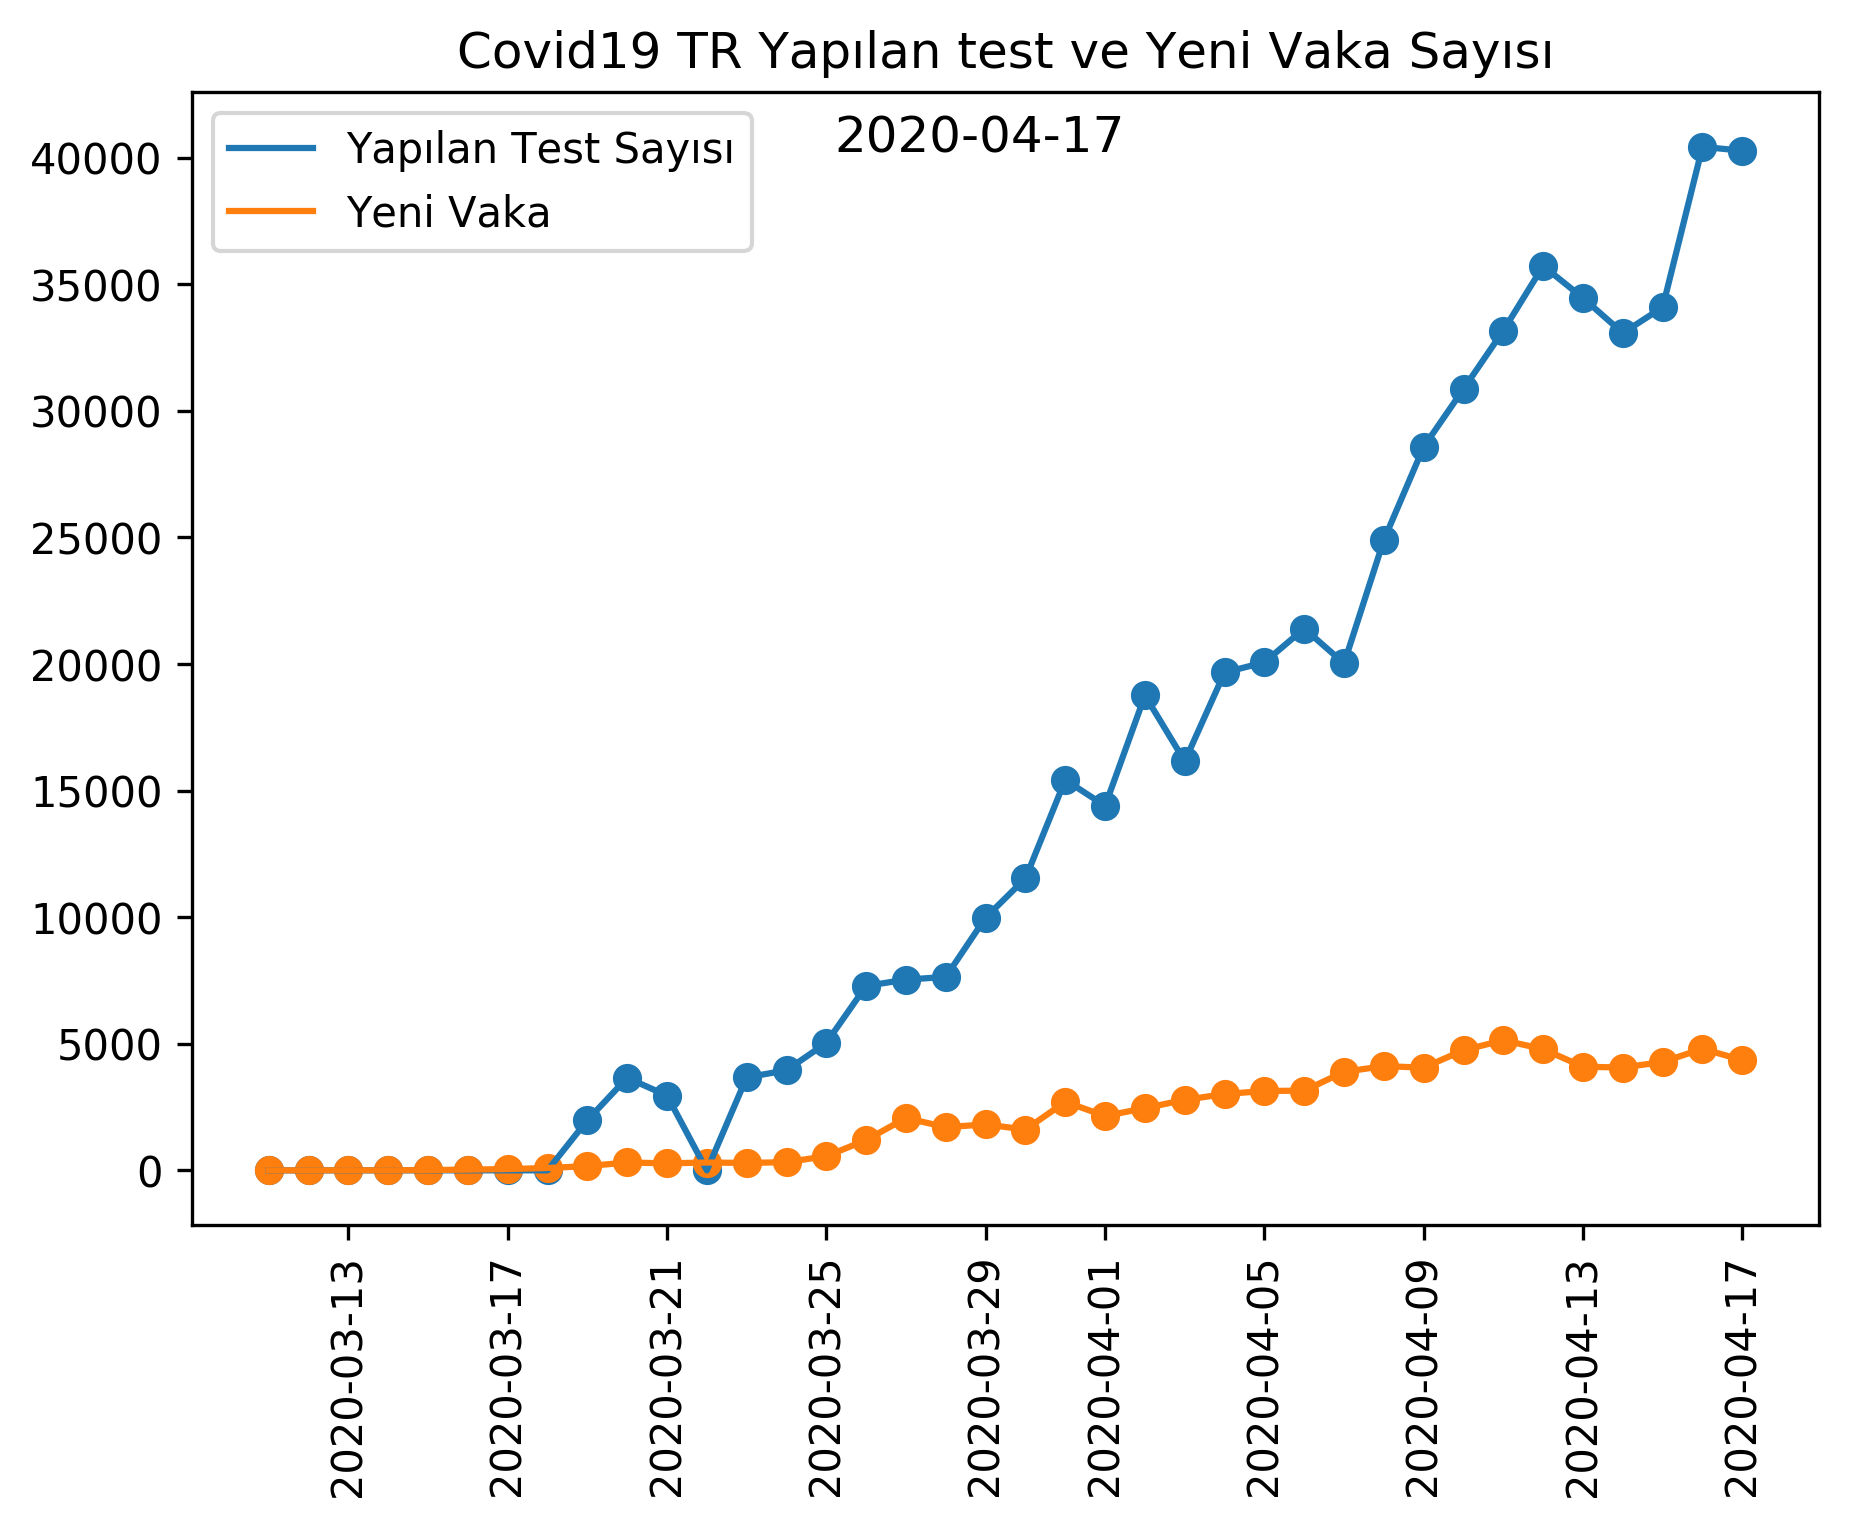

In [37]:
name = str(date[-1])
name_case_test = "case_test" + name +".png"

plt.figure(dpi=300,figsize=(7,5))
plt.plot(date,made_tests)
plt.scatter(date,made_tests)
plt.plot(date,new_cases)
plt.scatter(date,new_cases)
plt.legend(["Yapılan Test Sayısı","Yeni Vaka"])
plt.title("Covid19 TR Yapılan test ve Yeni Vaka Sayısı")
plt.xticks(rotation=90)
plt.figtext(.5,.84,date[-1], fontsize=12, ha='center')
plt.show()

In [38]:
i = 0
ratio = []

while i<len(new_cases):
    if made_tests[i]==0:
        ratio.append(0)
        i  = i + 1
    else:
        ratio.append(round(new_cases[i]/made_tests[i],2))
        i = i + 1

i = 0
while i<len(ratio):
    ratio[i] = ratio[i]*100
    ratio[i] = int(ratio[i])
    i = i + 1


## Yeni Vaka / Yapılan Test (%)

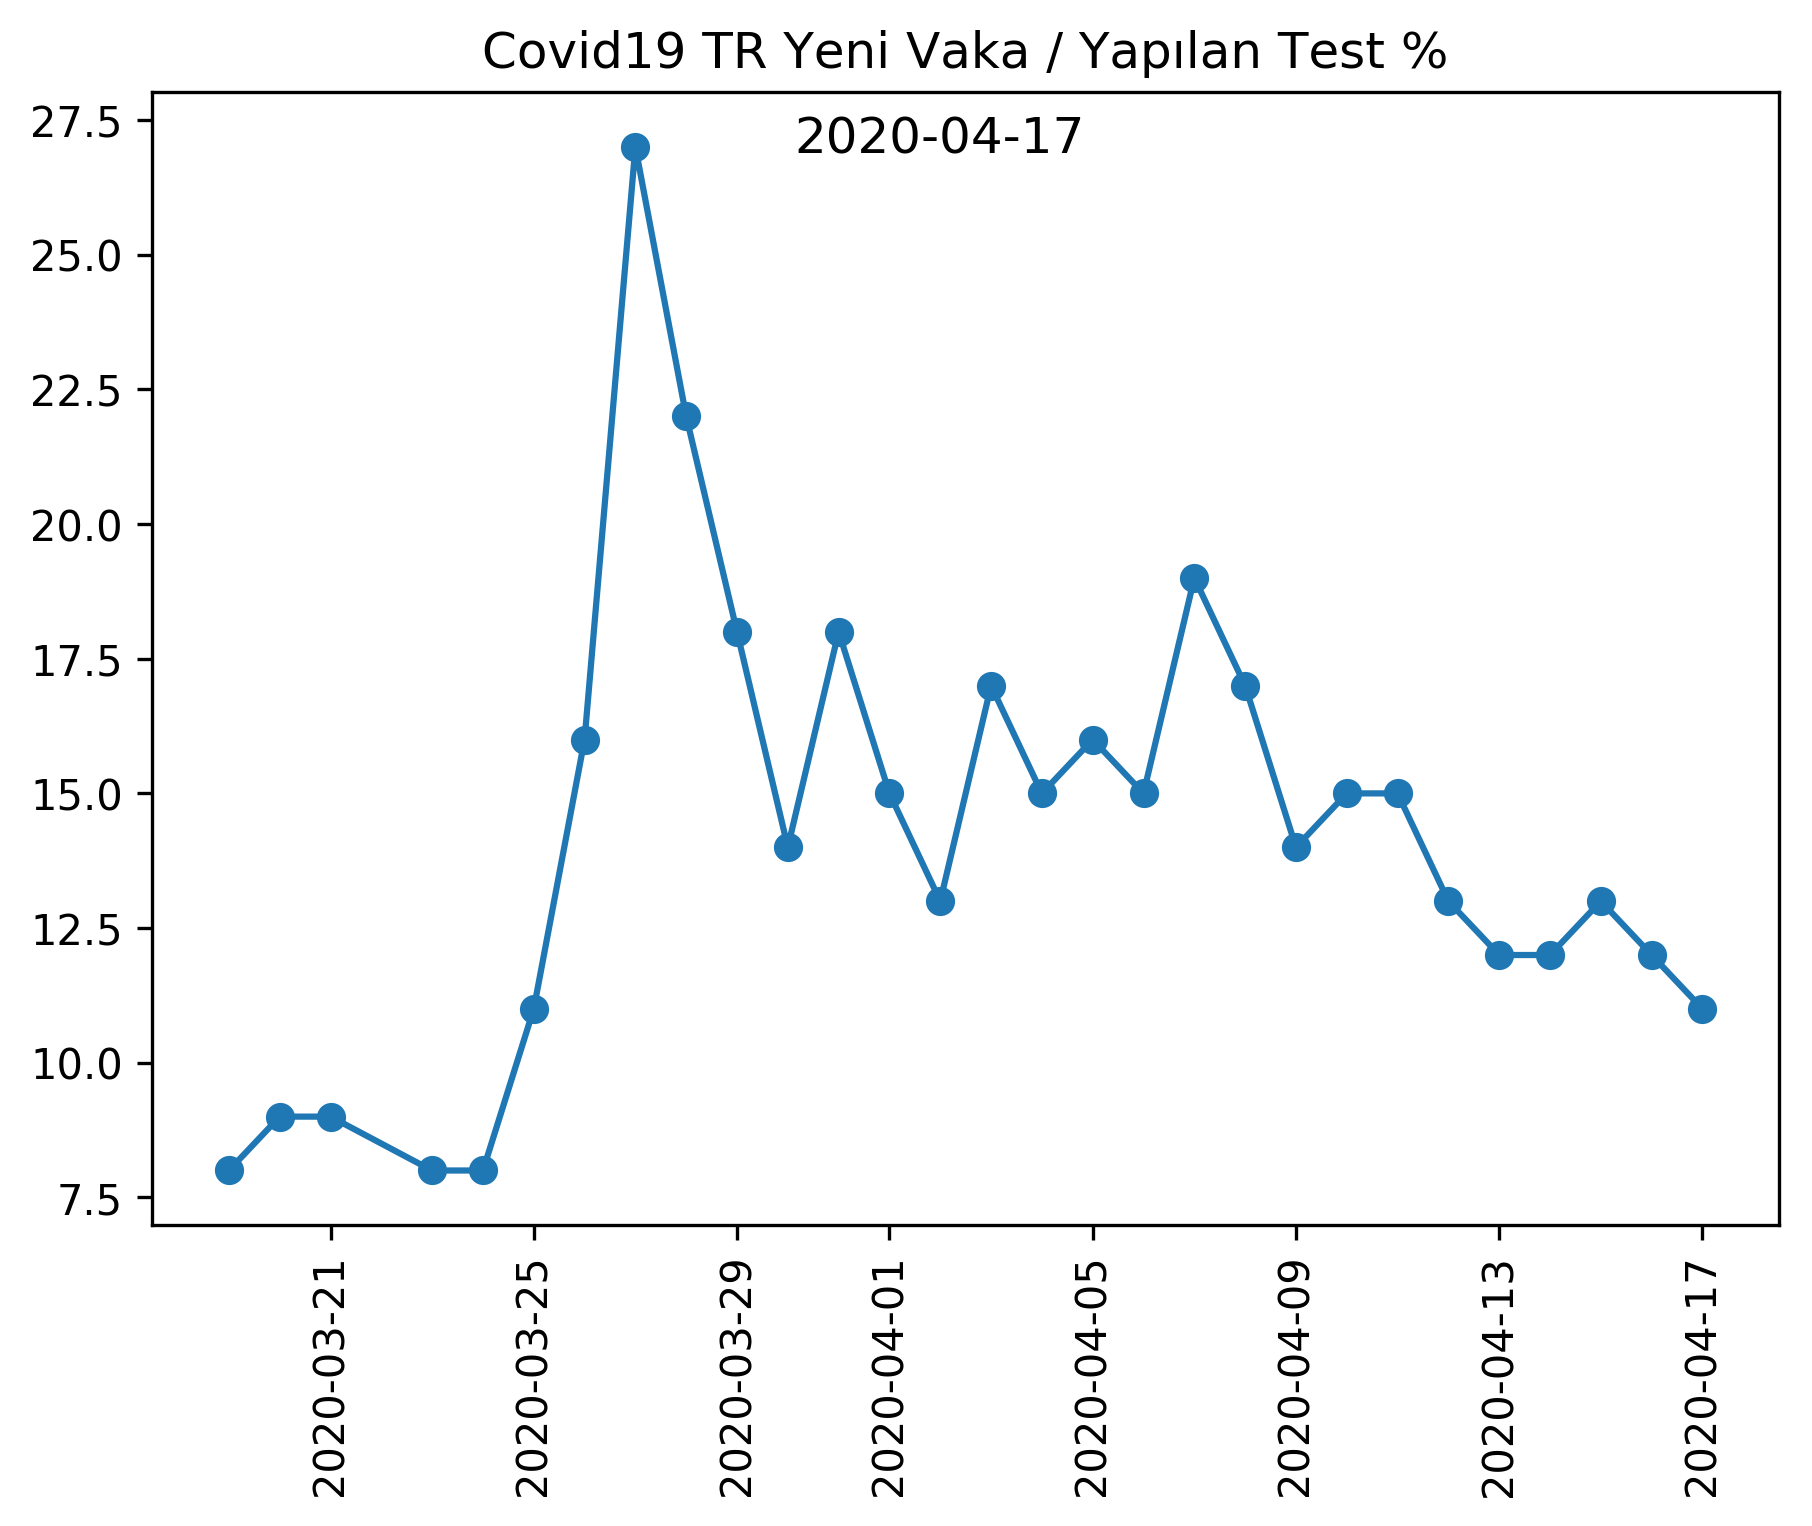

In [39]:
name = str(date[-1])
name_ratio = "ratio" + name +".png"

ratio_without_zeros = []
dates_without_zeros = []

i = 0
for i in range(len(ratio)):
    if ratio[i] != 0:
        ratio_without_zeros.append(ratio[i])
        dates_without_zeros.append(date[i])
        
        

plt.figure(dpi=300,figsize=(7,5))
plt.plot(dates_without_zeros,ratio_without_zeros)
plt.scatter(dates_without_zeros,ratio_without_zeros)
plt.title("Covid19 TR Yeni Vaka / Yapılan Test %")
plt.xticks(rotation=90)
plt.figtext(.5,.84,date[-1], fontsize=12, ha='center')
plt.show()

## Birden Fazla Veri Beraber

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



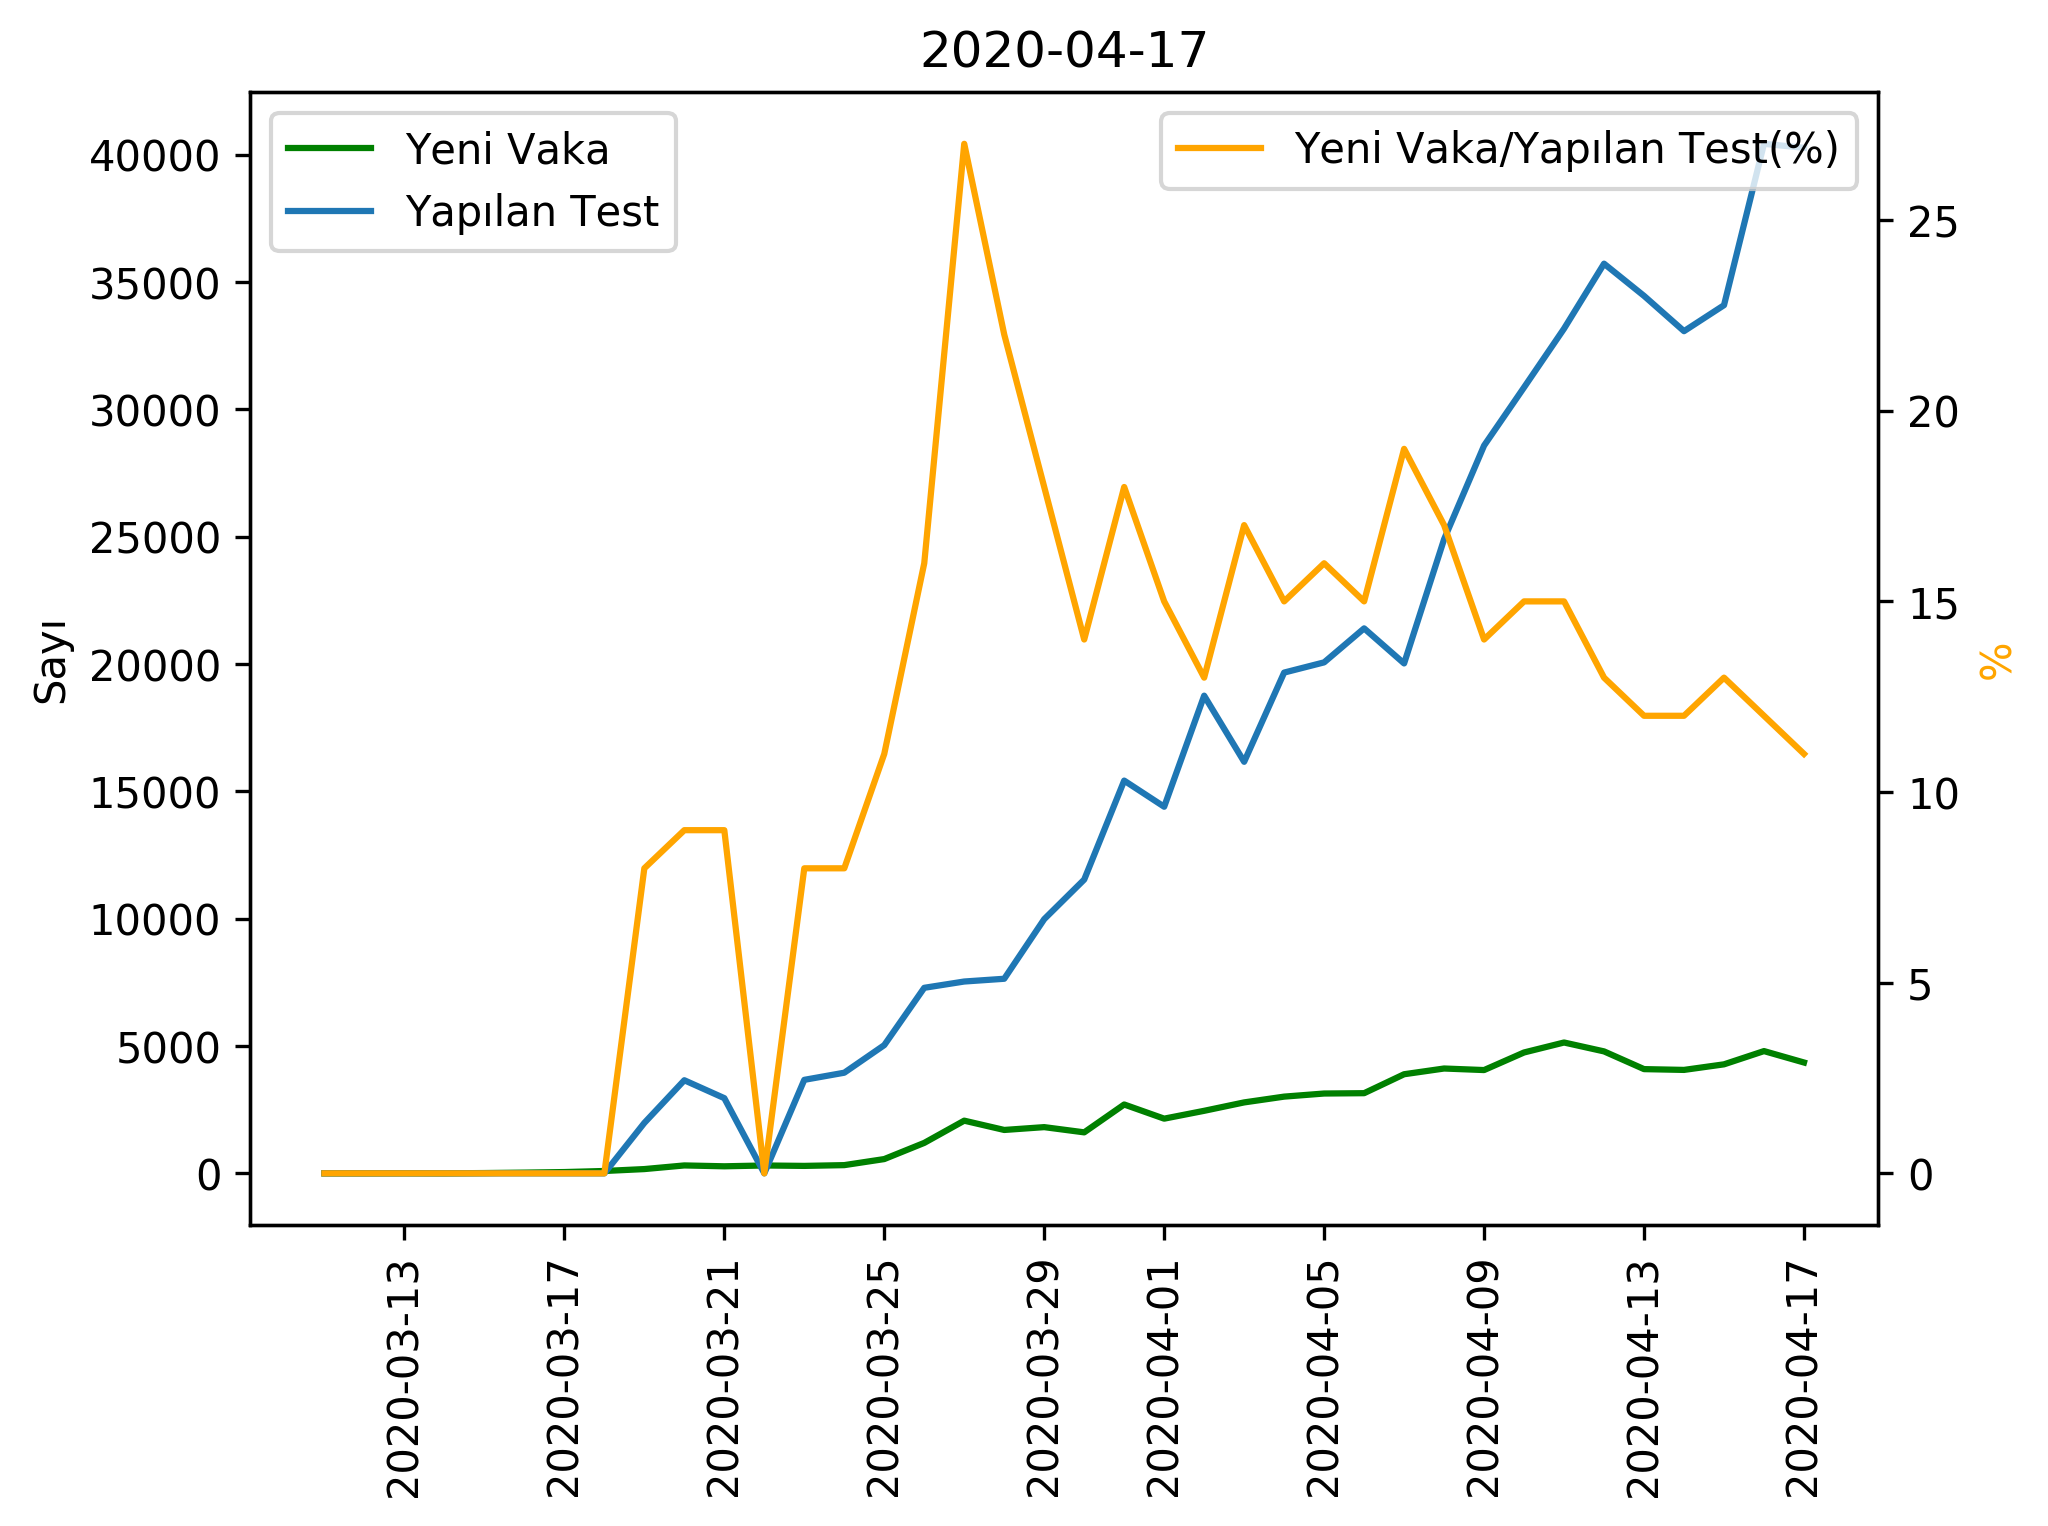

In [40]:
name = str(date[-1])
name_complex = "complex" + name +".png"

fig = plt.figure(dpi=300, figsize=(7,5))
plt.xticks(rotation=90)
plt.title(name)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(date,new_cases,color="g")
ax1.plot(date,made_tests)
ax1.legend(["Yeni Vaka", "Yapılan Test"])
ax2.plot(date,ratio, color="orange")
ax2.legend(["Yeni Vaka/Yapılan Test(%)"],loc=1)
ax1.set_ylabel('Sayı')
ax2.set_ylabel('%', color='orange')

plt.show()

In [41]:
logaritmic = []

i = 0

while i<len(case):
    logaritmic.append(mt.log10(case[i]))
    i=i+1

## Logaritmik Vaka Sayısı

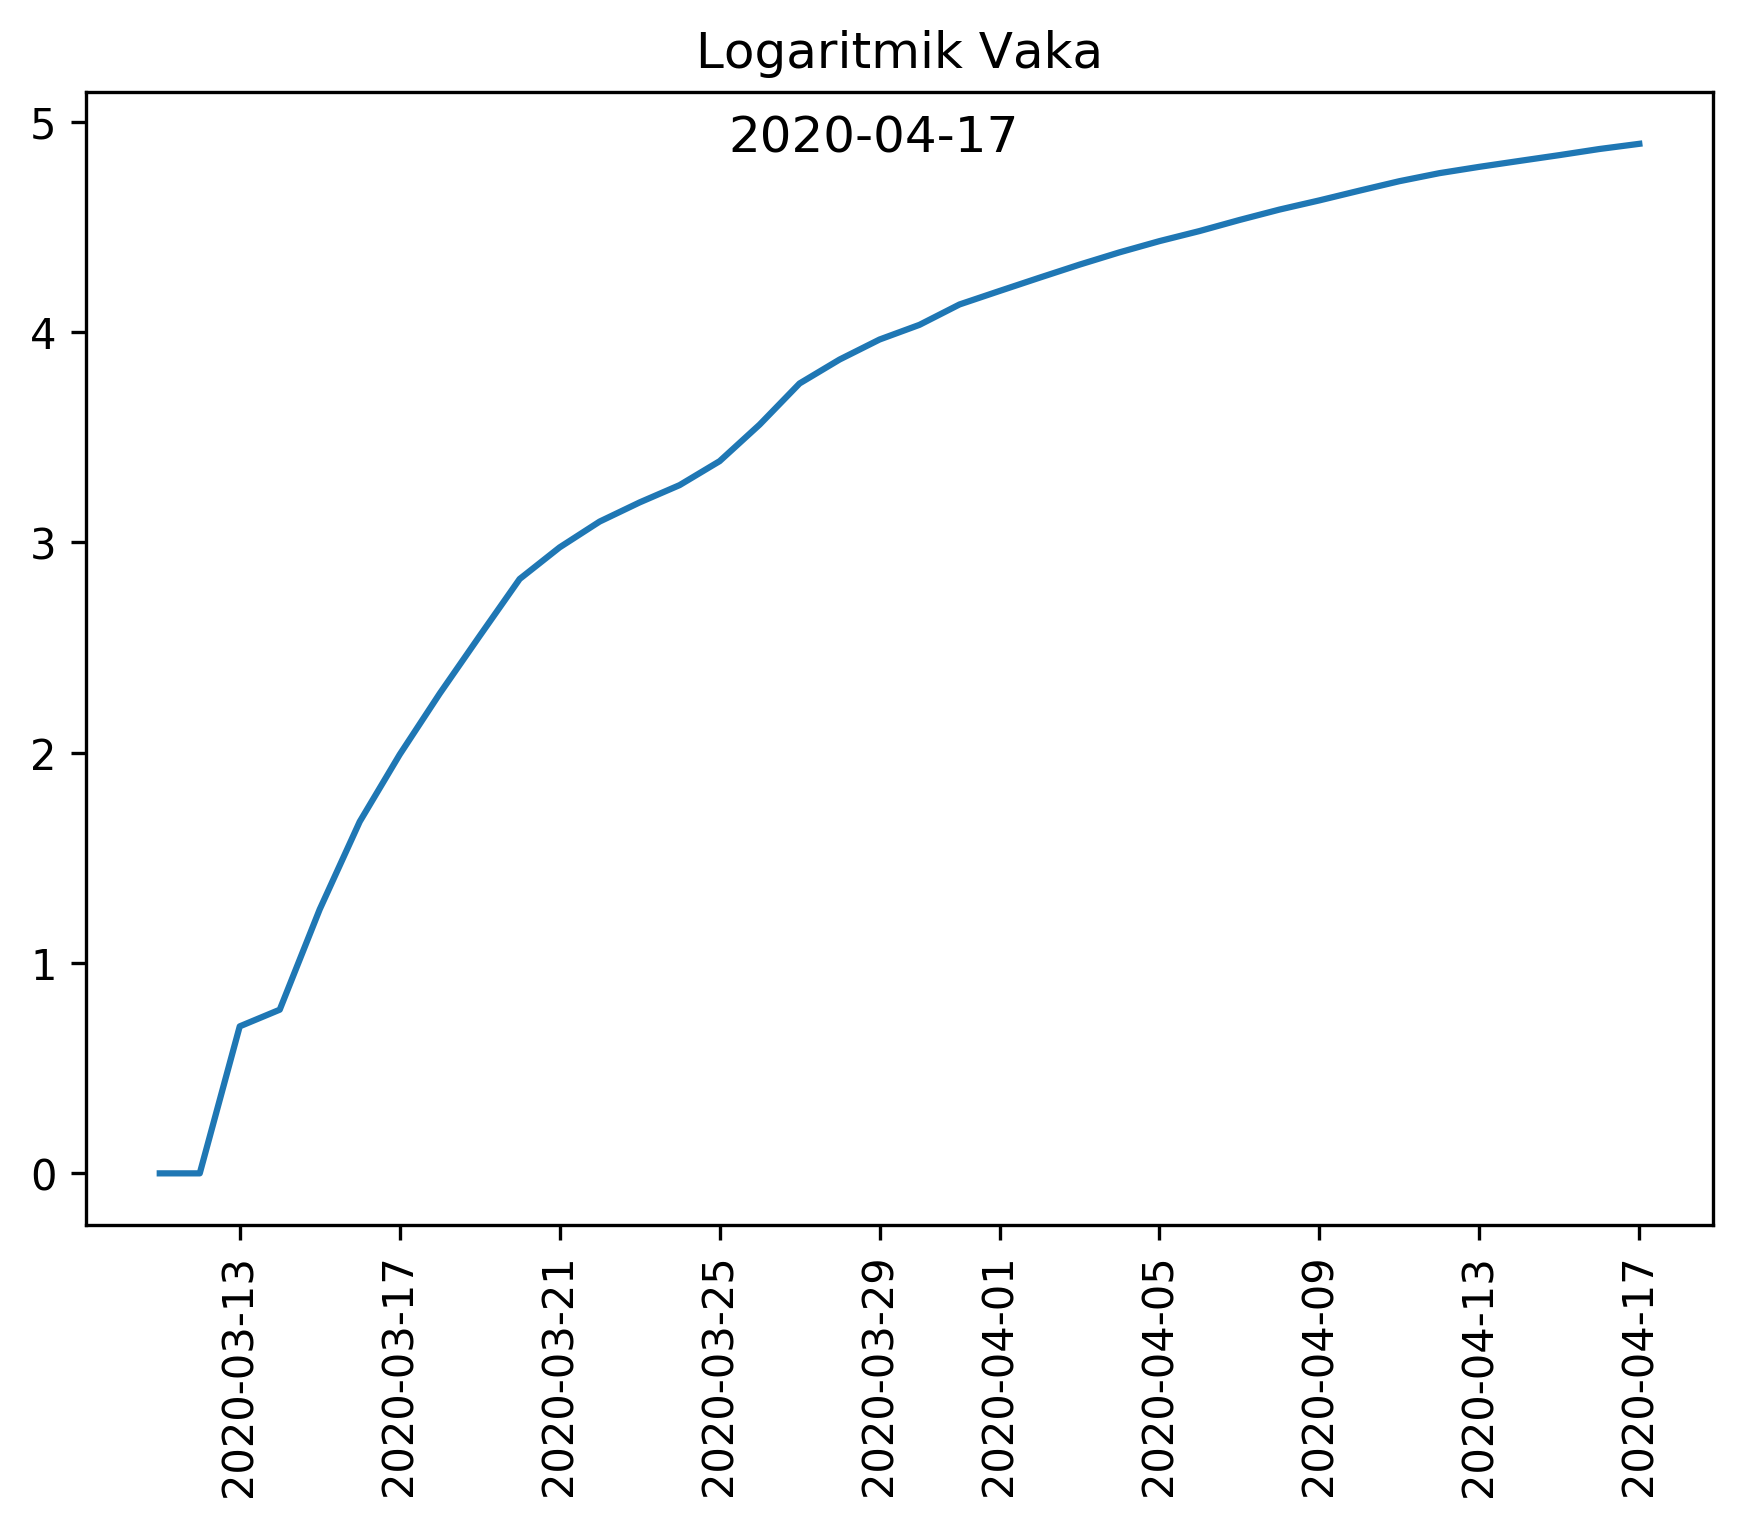

In [42]:
name = str(date[-1])
name_log_case = "log_case" + name +".png"

plt.figure(dpi=300, figsize=(7,5))
plt.plot(date, logaritmic)
plt.title("Logaritmik Vaka")
plt.figtext(.5,.84,date[-1], fontsize=12, ha='center')
plt.xticks(rotation = 90)
plt.show()

In [43]:
growth_rate = []

i = 0

while i<len(case):
    growth_rate.append(round(new_cases[i]/case[i-1],2)*100)
    i = i + 1

## Vaka Sayısı Artış Oranı (%)

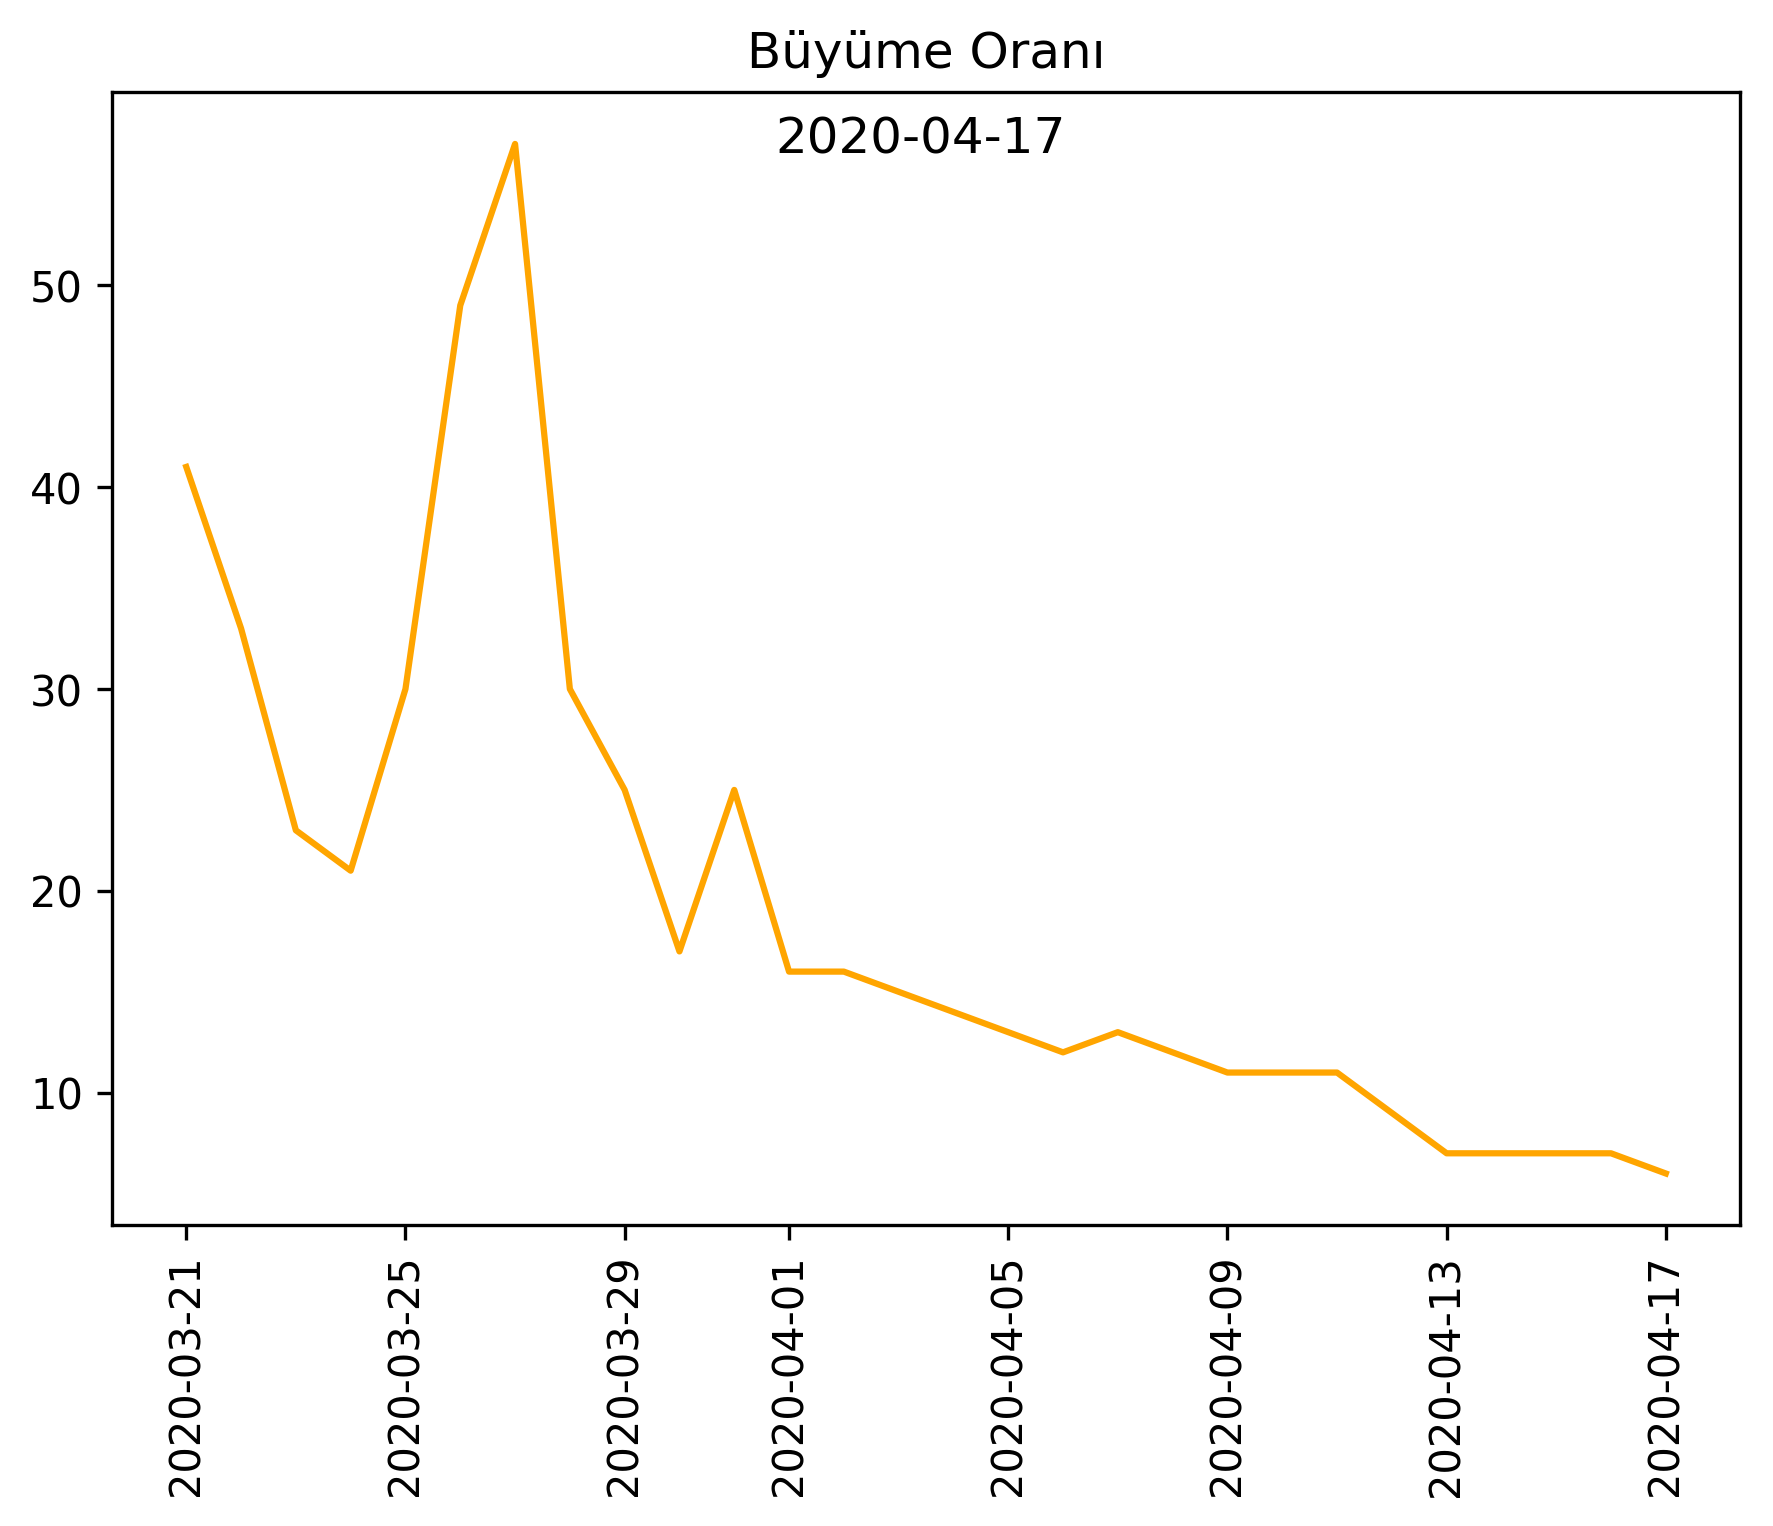

In [44]:
name = str(date[-1])
name_growth_rate = "growth_rate" + name +".png"


plt.figure(dpi=300, figsize=(7,5))
plt.plot(date[10:], growth_rate[10:], color="orange")
plt.xticks(rotation=90)
plt.title("Büyüme Oranı")
plt.figtext(.51,.84,date[-1], fontsize=12, ha='center')
plt.show()


In [45]:
i = 5
death_growth = []

while i<len(deaths):
    death_growth.append(round((deaths[i]-deaths[i-1])/deaths[i]*100,2))
    i = i+1 

## Ölüm Artış Oranı (%)

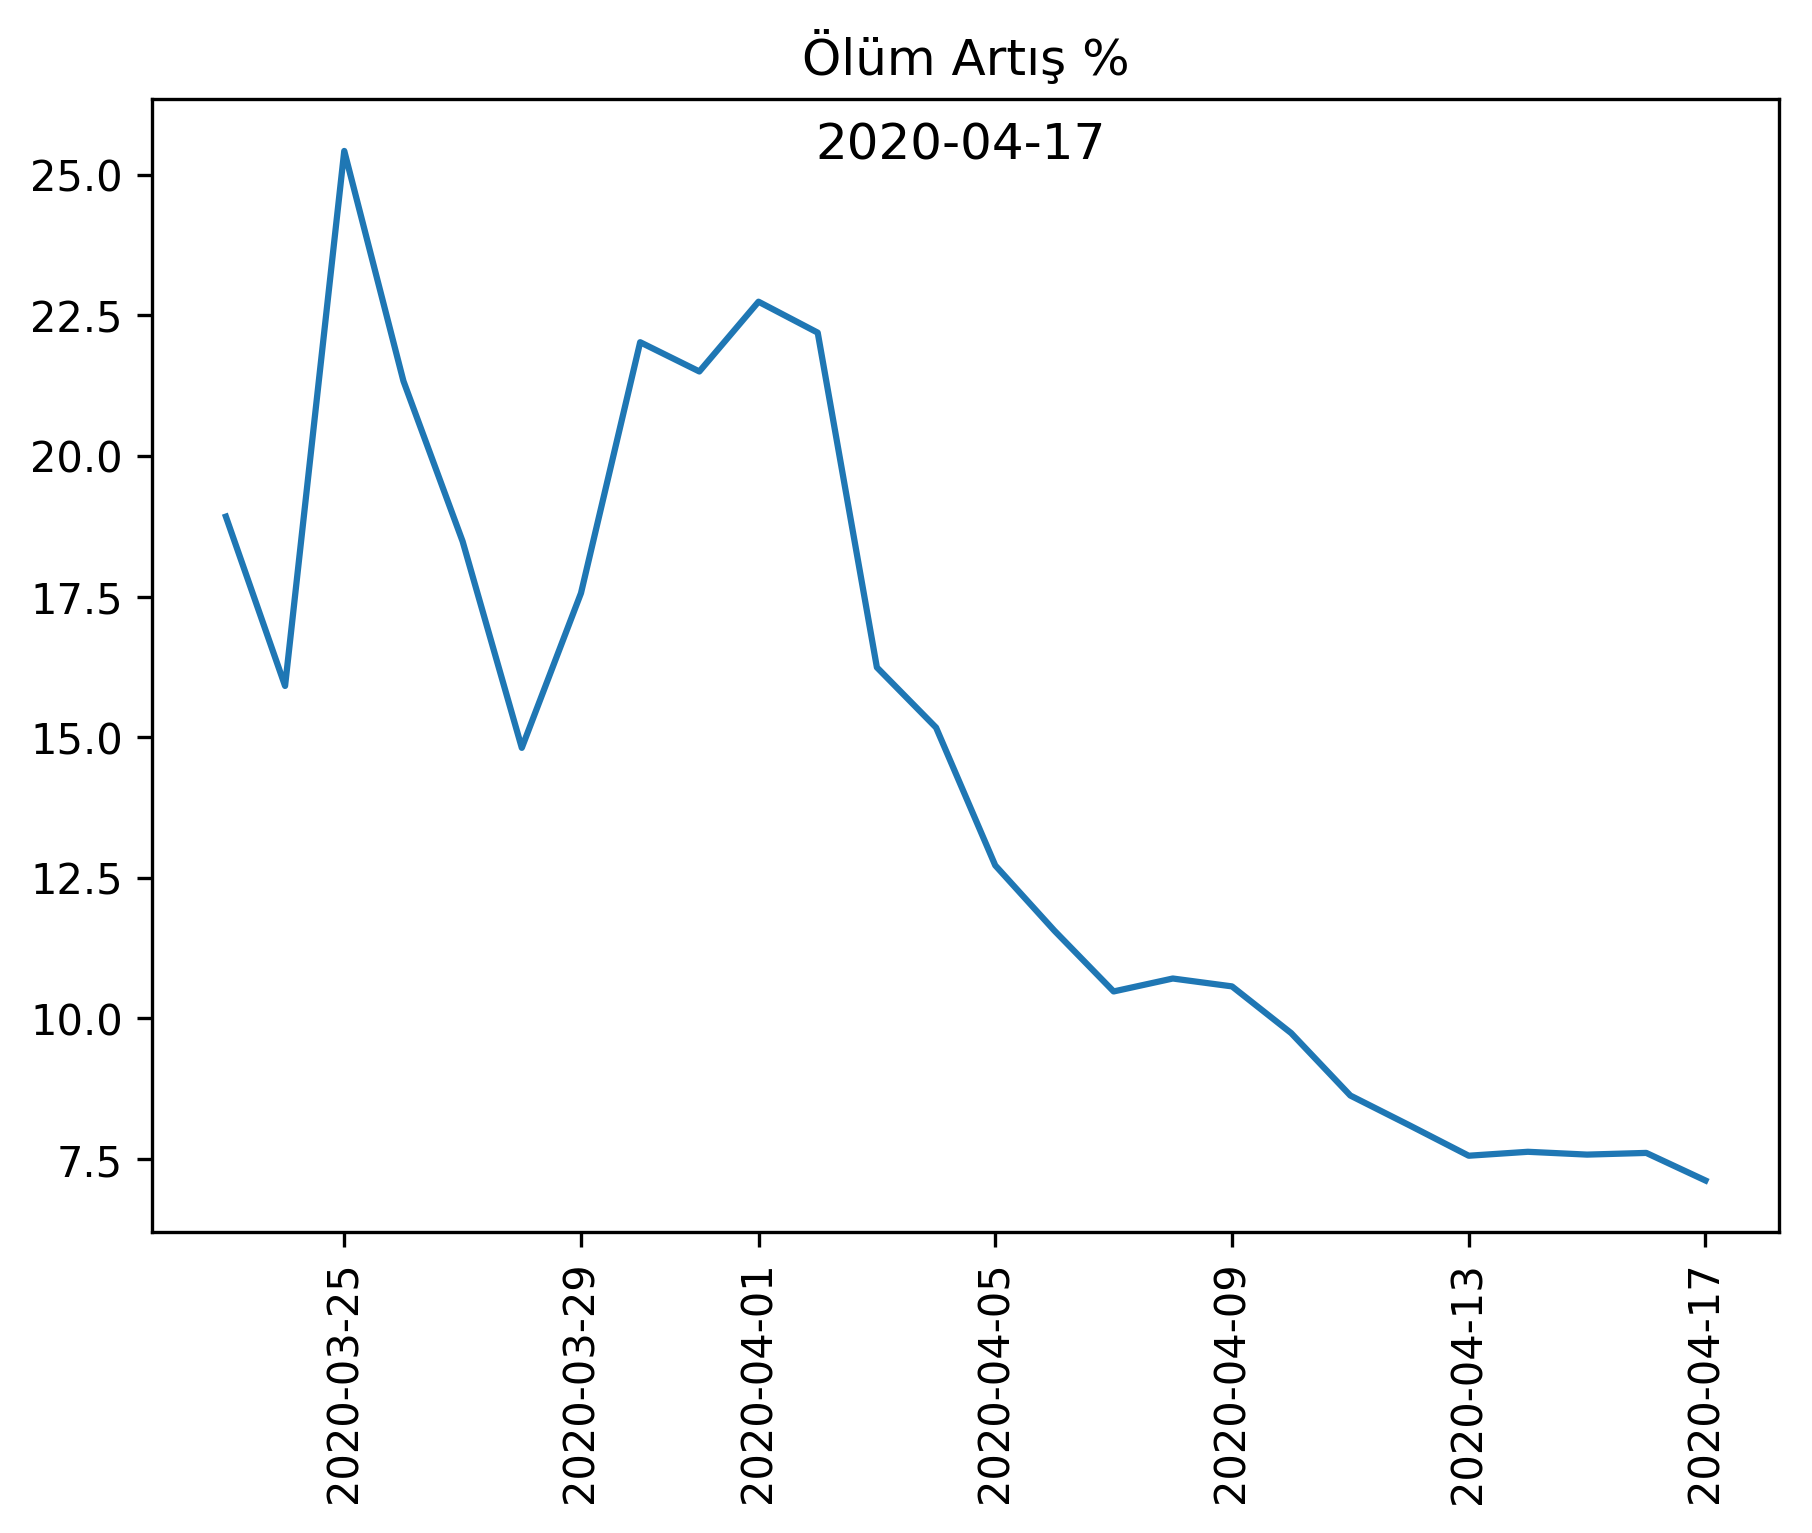

In [46]:
name = str(date[-1])
name_death_growth_rate = "death_growth_rate" + name +".png"



plt.figure(dpi=300, figsize=(7,5))
plt.plot(date[12:], death_growth[7:])
plt.title("Ölüm Artış %")
plt.figtext(.51,.84,date[-1], fontsize=12, ha='center')
plt.xticks(rotation=90)
plt.show()




## İnteraktif Grafik

In [48]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=x["Tarih"], y=x["Toplam Vaka Sayısı"], mode='lines+markers',name='Toplam Vaka'), secondary_y=False)
fig.add_trace(go.Scatter(x=x["Tarih"], y=x["Yeni Vaka Sayısı"], mode="lines+markers", name="Yeni Vaka"), secondary_y=False)
fig.add_trace(go.Scatter(x=x["Tarih"][5:], y=death_growth, mode="lines", name="Ölüm Büyüme Hızı"), secondary_y=True)
fig.add_trace(go.Scatter(x=x["Tarih"][9:], y=growth_rate[10:], mode="lines+markers", name="Vaka Artış Hızı"), secondary_y=True)
fig.show()


<b>Mehmet Numan Çam</b> <br>
İletişim: <a href="mailto:mncam051@gmail.com">mncam051@gmail.com</a>